In [1]:
from keras.utils import np_utils
import numpy as np
import keras
from time import time

Using TensorFlow backend.


In [2]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

In [3]:

train_data = datagen.flow_from_directory(
        directory=r'/home/prajacta/yt8m/youtube-8m-videos-frames/train1',
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary")

Found 1979 images belonging to 2 classes.


In [4]:
test_data = datagen.flow_from_directory(
    directory=r"/home/prajacta/yt8m/youtube-8m-videos-frames/1",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
)

Found 250 images belonging to 2 classes.


In [5]:
valid_data = datagen.flow_from_directory(
    directory=r"/home/prajacta/yt8m/youtube-8m-videos-frames/val1",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
)

Found 246 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#Adding sequential model in keras
model = Sequential()
# Image size 64*64 
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
#ReLu adds nonlinearity to the network.
model.add(Activation('relu'))
# Pooling helps to reduce dimensions.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Fully connected layer to detect final high level features.
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
#Dropout is added to reduce overfitting.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [7]:
cp = keras.callbacks.ModelCheckpoint('/home/prajacta/yt8m', 
                                                 save_weights_only=True,
                                                 verbose=1)
tb=keras.callbacks.TensorBoard(log_dir='./home'.format(time()), histogram_freq=0,  
          write_graph=True, write_images=True)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history=model.fit_generator(
        train_data,
        steps_per_epoch=train_data.n,
        epochs=50,
        validation_data=valid_data,
        validation_steps=valid_data.n, callbacks = [tb])
model.save('mymodel.h5') 

Epoch 1/50
1979/1979 [==============================] - 732s 370ms/step - loss: 0.4304 - acc: 0.7968 - val_loss: 0.4717 - val_acc: 0.8252
Epoch 2/50
1979/1979 [==============================] - 748s 378ms/step - loss: 0.2218 - acc: 0.9126 - val_loss: 0.4829 - val_acc: 0.8049
Epoch 3/50
1979/1979 [==============================] - 754s 381ms/step - loss: 0.1797 - acc: 0.9351 - val_loss: 0.7477 - val_acc: 0.8171
Epoch 4/50
1979/1979 [==============================] - 749s 379ms/step - loss: 0.1868 - acc: 0.9363 - val_loss: 0.8340 - val_acc: 0.8171
Epoch 5/50
1979/1979 [==============================] - 731s 369ms/step - loss: 0.1990 - acc: 0.9338 - val_loss: 0.5731 - val_acc: 0.7764
Epoch 6/50
1979/1979 [==============================] - 757s 383ms/step - loss: 0.2157 - acc: 0.9299 - val_loss: 0.7157 - val_acc: 0.8008
Epoch 7/50
1979/1979 [==============================] - 750s 379ms/step - loss: 0.2172 - acc: 0.9284 - val_loss: 1.1912 - val_acc: 0.8211
Epoch 8/50
1979/1979 [============

In [8]:
model.evaluate_generator(test_data, len(test_data))

[1.128835253715515, 0.7959999980926513]

In [9]:
probabilities = model.predict_generator(test_data, len(test_data))

In [10]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 125 + [1] * 125)
y_pred = probabilities > 0.5

confusion_matrix(y_true, y_pred)

array([[60, 65],
       [66, 59]])

In [11]:
import numpy as np
from keras.preprocessing import image
img = image.load_img('test3.jpg', target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print classes



[[1]]


In [12]:
label=train_data.class_indices

In [13]:
label

{'indoor': 0, 'outdoor': 1}

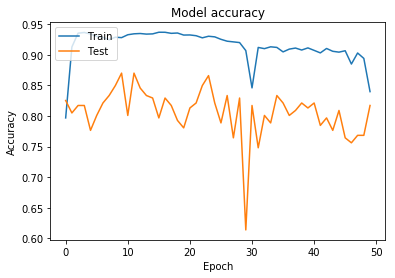

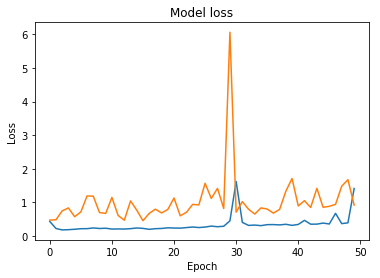

In [15]:
import matplotlib.pyplot as plt


# plots keras
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

